In [ ]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

Import all the necessary library in the cell below

In [57]:
import numpy as np
from numpy.linalg import solve
from scipy.optimize import fsolve
from scipy.integrate import odeint,quad
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LinearRegression

In [58]:
pwd

'/home/user/Downloads/python friday'

**Problem 1**

1- Load the titanic dataset from the seaborn package.

In [59]:
data=sns.load_dataset("titanic")

2- how many columns in this dataset?

In [60]:
data.shape[1]

15

3- list the names of all columns and describe the datatype of each column? 

In [61]:
print("name of colums:", data.columns)
data.info()

name of colums: Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 1

4- Count the number of missing values in each column

In [62]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

5- Clean the dataset by removing every record that contains a missing value? 

In [63]:
data.drop(columns=['deck'], inplace =True)
data.dropna(axis=0,inplace=True)

6 - Compute the average age of females and males who survived? 

In [64]:
m1=data.loc[(data['sex']=='female')|(data['sex']=='male')& (data['survived']==1)].age.mean()
# m2=data.loc[(data['sex']=='male')& (data['survived']==1)].age.mean()
print( m1)
# print("The average of male is:", m2)

27.62122159090909


6 - Count how many people survived by age and sex. Display the result as DataFrame. 

In [65]:
data[data["survived"]==1].groupby(by=["sex","age"]).count()["survived"].to_frame()

survived
sex    age            
female 0.75          2
       1.00          2
       2.00          2
       3.00          1
       4.00          5
...                ...
male   52.00         1
       56.00         1
       60.00         1
       62.00         1
       80.00         1

[103 rows x 1 columns]

7- Build a logistic regression model using the pclass, age, parch, sex, and fare columns as explanatory variables and the survived column as response variable

In [68]:
lb = LabelBinarizer()
data.sex = lb.fit_transform(data.sex)
data.sex.unique()
X = data[["pclass", "age", "parch","sex","fare"]].values.reshape(-1,5)
y = data["survived"].values.flatten()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
classifier = LogisticRegression(random_state = 0, multi_class='auto')
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

8- Measure its performance using accuracy score and display the confusion matrix. 

In [69]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
con_mat = confusion_matrix(y_test, y_pred)
print(con_mat)
print("Accuracy:", accuracy_score(y_test, y_pred))

[[88 16]
 [19 55]]
Accuracy: 0.8033707865168539


9- Interpret the result

The confusion matrix shows that our model is accurate at 80% because out of the total of 104 males, our model can predict 88 males as males and 16 as females also out of 74 females our model can predict 55 as females and 19 as males. All in All our model can be used in approximating males or females who survived.

**Problem 2**

Let assume we have the one dimensional process model
\begin{equation}
x_i = \alpha x_{i-1}+\delta_i, \text{ with }\delta_i\thicksim \mathcal{N}(0,q^2),\;\; i = 1,\cdots,N ,
\end{equation}
and $x_0\thicksim \mathcal{N}(\mu,r^2)$. Assume the data model is 

\begin{equation}
y_i = h_i x_{i}+\epsilon_i, \text{ with }\epsilon_i\thicksim \mathcal{N}(0,s^2),\;\; i = 1,\cdots,N ,
\end{equation}
where
$$
h_i =\begin{cases}
 1, \;\;& i=&1,\cdots,N_1\\
0.1, & i=&N_1+1,\cdots, N_2\\
0.9, & i=&N_2+1,\cdots,N
\end{cases}.
$$
Note that $N_1<N_2<N$.

1- Write Python function called **Process** that takes $\alpha, N, q, \mu, r$ and return the array $x$ of the $x_i, i=0,\cdots,N$.

In [70]:
def Process(al, N, q,mu,r):
    x = np.zeros(N+1)
    x[0] = np.random.normal(mu,r)
    for i in range(1, N+1):
        delta = np.random.normal(0, q)
        x[i] = al*x[i-1] + delta
        
    return x

2- Write Python function called **Data** that takes array $x$ of the $x_i$, $s, N_1, N_2, N$ and return the array $y$ of $y_i,i=1,\cdots,N$

In [71]:
def Data(x, s, N1,N2, N):
    global h
    h=np.ones(N)
    h[N1+1:N2+1]=0.1*h[N1+1:N2+1]
    h[N2+1:]=0.9*h[N2+1:]
    for i in range(N):
        y=h*x[1]+np.random.normal(0,s,N)
#     y=np.empty(N)
#     y[1:N1+1] = x[1:N1+1] + np.random.normal(0, s, N1)
#     y[N1+1:N2+1] = 0.1*x[N1+1:N2+1] + np.random.normal(0, s, N2-N1)
#     y[N2+1:N] = 0.9*x[N2+1:N] + np.random.normal(0, s, N-N2-1)
    return y

3- Write a program to plot the data on the same graph as the process model, for \begin{equation}
r = 0.1, q=0.4, s=0.9, \mu = 0.01, h= 1, \alpha = 0.8,N = 50,  N_1 = 20,  N_2 = 30
\end{equation}

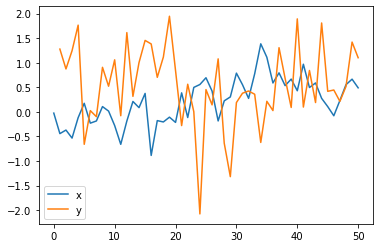

In [79]:
# np.random.seed(42)
x=Process(0.8, 50, 0.4,0.01,0.1)
y=Data(Process(0.8, 50, 0.4,0.01,0.1), 0.9, 20,30, 50)
# print(x)
# print(y)

plt.plot(np.arange(0, len(x)), x, label='x')
plt.plot(np.arange(1, len(x)), y, label='y')
plt.legend()
plt.show()

4- Use the general formulas given for the Kalman filter to find the one dimensional formulas for

\begin{equation}
\mu_{1\mid 0}, \sigma_{1\mid 0}, k_1, \mu_{1\mid 1},\sigma_{1\mid 1},
\end{equation}
in term of $\alpha, q,r,s,\mu$ and $y_1$ (write the answer as markdown)

$$\mu_{1|0}=\alpha \mu$$
$$\sigma_{1\mid 0}=q+\alpha^2 r$$
$$k_1=(q+\alpha^2 r)(q+\alpha^2 r+s)^{-1}$$
$$\mu_{1\mid 1}=\alpha \mu + (q+\alpha^2 r)(q+\alpha^2 r+s)^{-1}(y_1-\alpha \mu)$$
$$\sigma_{1\mid 1}=(1-(q+\alpha^2 r)(q+\alpha^2 r+s)^{-1})(q+\alpha^2 r)$$

5- Using the general formulas given for the Kalman filter, write Python program to calculate
\begin{equation}
\mu_{i\mid i-1}, \sigma_{i\mid i-1}, k_i, \mu_{i\mid i},\sigma_{i\mid i},
\end{equation}
for $i=1,\cdots, N$. Be sure to
initialize the loop over $i$. Hint: I suggest using $\text{mu\_old}[i]$ for $\mu_{i\mid i-1}$, $\text{sigma\_old}[i]$ for $\sigma_{i\mid i-1}$, $\text{mu\_new}[i]$ for $\mu_{i\mid i}$, $\text{sigma\_new}[i]$ for $\sigma_{i\mid i}$

In [80]:
def fs(al,N,q,N1,N2,r,mu,s):
    mu_old=np.empty(N)
    mu_new=np.empty(N)
    k=np.empty(N+1)
    sigma_new=np.empty(N)
    sigma_old=np.empty(N)
    mu_old[0]=al*mu
    sigma_old[0]= q+r*al**2
    k[0]=(q+r*al**2)*(q+r*al**2+s)**(-1)
    sigma_new[0]=al*mu+(q+r*al**2)*(q+r*al**2+s)**(-1)*(1-al*mu)
    mu_new[0]=(1-(q+r*al**2)*(q+r*al**2+s)**(-1))*(q+r*al**2)
#     def h(i):
#         if (i>=1 and i<N1+1):
#             E=1
#         elif (i>=N1+1 and i<N2+1):
#             E=0.1
#         else:
#             E=0.9
#         return E
    
    for i in range(1,N):
        mu_old[i]=al*mu_new[i-1]
        sigma_old[i]=q+al*sigma_new[i-1]*al
        k[i]=sigma_old[i]*h[i]*(h[i]*sigma_old[i]*h[i]+r)**(-1)
        mu_new[i]=mu_old[i]+k[i]*(y[i]-h[i]*mu_old[i])
        sigma_new[i]=(1-k[i]*h[i])*sigma_old[i]
        
    return mu_new ,sigma_new, mu_old, sigma_old
mu_new, sigma_new, mu_old, sigma_old= fs(0.8,50,0.4,20,30,0.1,0.01,0.9) 
print("forcasted are",mu_old, sigma_old)
print("filtred are",mu_new, sigma_new)

forcasted are [ 0.008       0.24492669  0.62938904  0.90709919  1.28765003 -0.24547029
 -0.01886311 -0.06664233  0.58440566  0.42690144  0.75564924  0.05839649
  1.06530343  0.36124946  0.70972062  1.05552501  1.05826454  0.61388082
  0.81989714  1.39358655  0.75252625 -0.07340857  0.13861597  0.10603093
 -1.15962165 -0.56019268 -0.31465223  0.50919992 -0.06953134 -0.96892719
 -0.57481744 -0.15350843  0.32068757  0.3061746  -0.38438005  0.08634656
  0.03343479  0.92181431  0.63378349  0.1701859   1.3560262   0.29769088
  0.64124152  0.24157718  1.30951059  0.51448229  0.39910607  0.21783472
  0.39966721  1.06363957] [0.464      0.62109091 0.45512456 0.45247106 0.45241568 0.45241452
 0.4524145  0.4524145  0.4524145  0.4524145  0.4524145  0.4524145
 0.4524145  0.4524145  0.4524145  0.4524145  0.4524145  0.4524145
 0.4524145  0.4524145  0.4524145  0.4524145  0.67701282 0.80581407
 0.87726252 0.91616665 0.93713604 0.94837671 0.95438455 0.95759054
 0.95929991 0.96021092 0.47001087 0.4625757

6- Write a Python program to plot the states $x_i$ and data $y_i$ together with the filtered and forecasted estimates on the same graph.

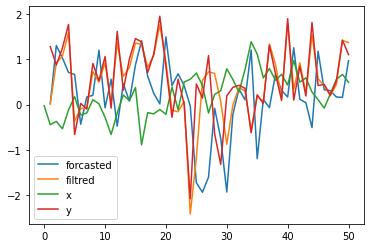

In [81]:
plt.plot(np.arange(1,len(x)),np.random.normal(mu_old,sigma_old), label='forcasted')
plt.plot(np.arange(1,len(x)),np.random.normal(mu_new,sigma_new),label='filtred')
plt.plot(np.arange(0,len(x)),x,label='x')
plt.plot(np.arange(1,len(x)),y, label='y')
plt.legend()

plt.show()

**Problem 3**

1- Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_1<\cdots<x_{N-1}<x_N=b$ and $H$ be the length of the $k$-th subinterval ($H = x_k - x_{k-1}$),
then we have 
$$\int_a^bf(x)dx \approx \sum_{k=1}^N \frac{f(x_{k-1})+f(x_k)}{2}H = Z$$


Write a function named <b>Trap</b> that takes $a,b,N, f$ as inputs and return Z. Here, ``N = 50`` is the default value.

In [100]:
def Trap(a,b,N,f):
    H=(b-a)/(N-1)
    x=np.linspace(a,b,N)
    Z=0
    for k in range(1,N):
        Z+=H*(f(x[k-1])+f(x[k]))/2
    return Z

2- Let $m_k$  be the midpoint of the subinterval $[x_k,x_{k+1}]$ for all $k=1,\cdots,N-1$, we have 

$$\int_a^bf(x)dx \approx \sum_{m_k} f(m_{k})H = W$$

Write a function named <b>Mid</b> that takes $a,b,N, f$ as inputs and return W. Here, ``N = 50`` is the default value.

In [101]:
def MId(a,b,N,f):
    H=(b-a)/(N-1)
    x=np.linspace(a,b,N)
    W=0
    for k in range (0,N-1):
        m=(x[k]+x[k+1])/2
        W+=H*f(m)
    return W

3- Using **Trap, Mid** and python inbuilt function **odeint**, compute and display the integral 

$$A = \int_0^{\sqrt{\ln(2)}}xe^{x^2}dx$$

In [102]:
f=lambda x: x*np.exp(x**2)
A=quad(f,0,(np.log(2))**0.5)[0]
print("Trap A=", Trap(0,(np.log(2))**0.5,50,f))
print("MId A=", MId(0,(np.log(2))**0.5,50,f))
print("quad A=", A)

Trap A= 0.5000907539443507
MId A= 0.49995462506586774
quad A= 0.4999999999999998


4- After computing the exact value of $A$, write a Python program that searches for the minimun values $N_{Trap}, N_{Mid}$ less than 10000 such that **Trap, Mid**, respectively, give a better approximation of $A$ then **odeint**.  If any the value  $ N_{Trap}, N_{Mid}$ doesn't exist your program should print the string **No $N_{Trap}$ found** or **No $N_{Mid}$ found**, respectively.

In [104]:
N_Trap=9000
E_Trap=abs(0.5-Trap(0,(np.log(2))**0.5,N_Trap,f))
while N_Trap<10000 and E_Trap>=abs(0.5-A):
    N_Trap +=1
    E_Trap=abs(0.5-Trap(0,(np.log(2))**0.5,N_Trap,f))
if N_Trap>=10000:
    print("No Ntrap Found")
else:
    print("N_Trap=",N_Trap)

        
N_MId=9000
E_MId=abs(0.5-MId(0,(np.log(2))**0.5,N_MId,f))
while N_MId<10000 and E_MId>=abs(0.5-A):
    N_MId+=1
    E_MId=abs(0.5-MId(0,(np.log(2))**0.5,N_MId,f))
if N_MId>=10000:
    print("No N_MId Found")
else:
    print("N_Mid=",N_MId)
        

No Ntrap Found
No N_MId Found


**Problem 4**

Let $\{ t_k\}$ be a partition of $[a,b]$ such that $a=t_0<t_2<\cdots<t_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = t_k - t_{k-1}$). Let us consider initial value problem

\begin{equation}\label{eul2}
  \begin{cases}
    \dfrac{dz}{dt} = f(z,t),      & \quad \text{on } [a, b]\\\\
    z(a) = c,
  \end{cases}
\end{equation}
where $z,f,c\in R^M$ i.e. $z = [x_1, x_2,\cdots, x_{M}]$, $c = [x_1(a), x_2(a),\cdots, x_{M}(a)]$ and $f = [f_1, f_2,\cdots, f_{M}]$. Note that \eqref{eul2} is a the general form of system of ODEs. 

Let $t, z_k,Z$ defined as follows $$t=[t_0,t_2,\cdots,t_{N-1},t_{N}],\quad z_k = [x_1(t_k), x_2(t_k),\cdots, x_{M}(t_k)], \quad
Z =\begin{pmatrix}
x_1(t_0)& x_2(t_0)&\cdots& x_{M}(t_0)\\
x_1(t_1)& x_2(t_1)&\cdots& x_{M}(t_1)\\
x_1(t_2)& x_2(t_2)&\cdots& x_{M}(t_2)\\
\vdots& \vdots&\ddots& \vdots\\
x_1(t_{N})& x_2(t_{N})&\cdots& x_{M}(t_{N})
\end{pmatrix}
$$

1. Write a python function <b> EulerOdeSys </b> that takes $f,c,t$ and return the solution $Z$ of the initial value problem \eqref{eul2} using Euler method i.e.
$$ z_{k+1} = z_k + Hf(z_k,t_k) $$


In [86]:
def EulerOdeSys(f,c,t):
    H = (t[1]-t[0]) 
    z = np.zeros((len(t),len(c)))
    z[0] = c
    for i in range(len(t)-1):
            z[i+1]= z[i] + H*f(z[i],t[i])
    return z

2. Write a python function <b> RalstonOdeSys </b> that takes $f,c,t$ and return the solution $Z$ of the initial value problem (1) using the Ralston method i.e.

\begin{equation}
\begin{cases}
k_1 = f(z_k,t_k),\\\\
k_2 = f(z_k+\dfrac{2}{3}Hk_1, t_k + \dfrac{2}{3}H),\\\\
z_{k+1} = z_k + H(\dfrac{1}{4}k_1+\dfrac{3}{4}k_2)
\end{cases}
\end{equation}


In [87]:
def RalstonOdeSys(f,c,t):
    H = (t[1]-t[0]) 
    z = np.ones((len(t),len(c)))
    z[0] = c
    for k in range(len(t)-1):
            k_1=f(z[k],t[k])
            k_2=f(z[k]+(2/3)*H*k_1,t[k]+(2/3)*H)
            z[k+1]= z[k] + H*(0.25*k_1+0.75*k_2)
    return z

**Problem 5**

Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_0<\cdots<x_{N-1}<x_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = x_k - x_{k-1}$). Let consider the second-order differential equation

\begin{equation}
  \begin{cases}
   \dfrac{d^2 y}{dx^2} + \dfrac{d y}{dx}-6y = 0 \qquad\forall x\in [a,b]\\\\
\dfrac{d y}{dx}(a)=0 , y(a) = 1
  \end{cases}
\end{equation}

Let $\{ y_k\}$ be the approximate solution i.e.  $y_k\approx g(x_k)=g_k$ where $g(x) = \dfrac{3}{5}e^{2x}+ \dfrac{2}{5}e^{-3x}$ is the exact solution. Let us denote $e_k = \mid g_k - y_k\mid$

1- Using the Python in-built function **odeint**, write a python function <b> SODE </b> that takes $a,b,N$ (with $N= 100$ as default value) and return array of all $x_k$, $y_k$, $g_k$ and $e_k$.


In [89]:
def f(w,x):
    y,v=w
    dydx=v
    dvdx=6*y-v
    return np.array([dydx,dvdx])

def SODE(a,b,N):
    w0=[1,0]
    g=lambda x: 0.6*np.exp(2*x)+0.4*np.exp(-3*x)
    x=np.linspace(a,b,N+1)
    w=odeint(f,w0,x)
    y=w[:,0]
    return x,y,g(x),abs(y-g(x))

2- Using **SODE**, solve the second-order differential equation for $a = 0, b = 2$ and use subplot to plot side by side
- $y_k$ and $g_k$ vs $x_k$
- $e_k$ vs $x_k$

y= [ 1.          1.00119228  1.00474041  1.01060619  1.01875767  1.02916894
  1.04182002  1.05669662  1.07379002  1.09309695  1.11461947  1.13836486
  1.16434554  1.19257899  1.22308771  1.25589914  1.29104568  1.32856462
  1.36849814  1.41089334  1.45580224  1.5032818   1.55339395  1.60620566
  1.66178899  1.72022116  1.78158464  1.84596721  1.91346212  1.98416813
  2.05818972  2.13563714  2.21662663  2.30128053  2.38972748  2.48210257
  2.57854756  2.67921107  2.78424883  2.89382383  3.00810667  3.12727573
  3.25151747  3.38102672  3.51600699  3.65667073  3.80323971  3.95594534
  4.11502904  4.28074259  4.45334855  4.63312066  4.82034428  5.01531682
  5.21834823  5.42976144  5.64989296  5.87909331  6.11772764  6.3661763
  6.62483542  6.89411756  7.17445235  7.46628719  7.77008795  8.08633971
  8.41554754  8.7582373   9.11495648  9.48627506  9.87278645 10.27510841
 10.69388403 11.1297828  11.58350162 12.05576595 12.54733097 13.05898277
 13.59153962 14.14585325 14.72281027 15.3233335  

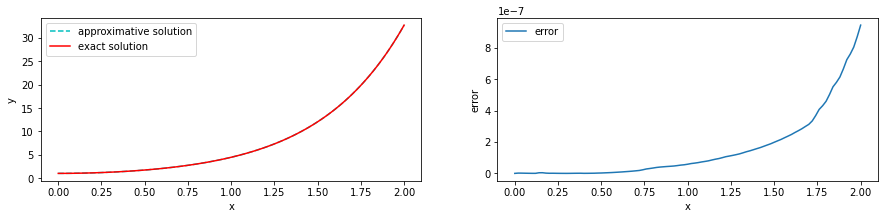

In [90]:
SODE(0,2,100)
x=SODE(0,2,100)[0]
y=SODE(0,2,100)[1]
e=SODE(0,2,100)[3]
print('y=',y)
plt.figure(figsize=(15, 3))

plt.subplot(1,2,2)
plt.plot(x,e,label='error')
plt.xlabel('x')
plt.ylabel('error')
plt.legend()

plt.subplot(1,2,1)
plt.plot(x,y,'--c',label='approximative solution')
plt.plot(x,g(x), 'r',label='exact solution')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

3- Using <b> RalstonOdeSys </b>, solve the second-order differential equation for $a = 0, b = 2$ and use subplot to plot side by side
- $y_k$ and $g_k$ vs $x_k$
- $e_k$ vs $x_k$

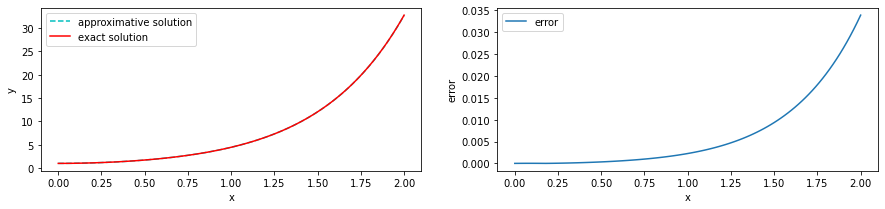

In [91]:
c=np.array([1,0])
N=100
w=RalstonOdeSys(f,c,x)

plt.figure(figsize=(15, 3))

plt.subplot(1,2,2)
plt.plot(x,abs(w[:,0]-g(x)),label='error')
plt.xlabel('x')
plt.ylabel('error')
plt.legend()

plt.subplot(1,2,1)
plt.plot(x,w[:,0],'--c',label='approximative solution')
plt.plot(x,g(x), 'r',label='exact solution')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

4- Using <b> EulerOdeSys </b>, solve the second-order differential equation for $a = 0, b = 2$ and use subplot to plot side by side
- $y_k$ and $g_k$ vs $x_k$
- $e_k$ vs $x_k$

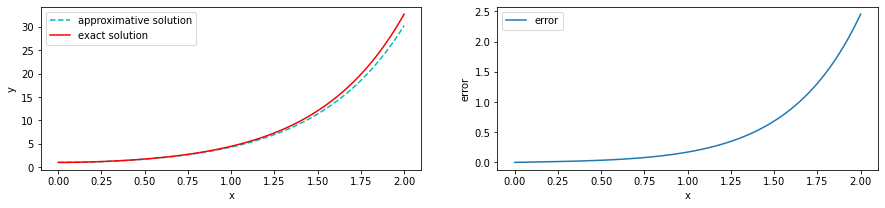

In [92]:
c=np.array([1,0])
N=100
w= EulerOdeSys(f,c,x)

plt.figure(figsize=(15, 3))

plt.subplot(1,2,2)
plt.plot(x,abs(w[:,0]-g(x)),label='error')
plt.xlabel('x')
plt.ylabel('error')
plt.legend()

plt.subplot(1,2,1)
plt.plot(x,w[:,0],'--c',label='approximative solution')
plt.plot(x,g(x), 'r',label='exact solution')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

5- The L2 error, $L2Er$ between the exact and the approximate solution given by

$$L2Er = \sum_0^N H(y_k - g_k)^2$$


Write a function called **L2_error** that takes $a,b,H$ and return the L2 error $g_k$ and the approximate solution $y_k$ obtained using **Odeint**, **RalstonOdeSys** and **EulerOdeSys**.

In [93]:
def L2_error(a,b,H):
    N=int((b-a)/H)+1
    x,y,g,er=SODE(a,b,N)
    yR=RalstonOdeSys(f,c,x)
    yE=EulerOdeSys(f,c,x)
    g=0.6*np.exp(2*x)+0.4*np.exp(-3*x)
    L2Er_SODE=H*(y-g)**2
    L2Er_Ral=H*(yR[:,0]-g)**2
    L2Er_Eul=H*(yE[:,0]-g)**2
    return np.array([sum(L2Er_SODE),sum(L2Er_Ral),sum(L2Er_Eul)]),g,y,yR[:,0],yE[:,0]
    

6- Let us denote $L2Er_j$ the output of **L2_error** for a given argument $a,b,H_j$. Using **Odeint**, **RalstonOdeSys** and **EulerOdeSys**, compute the array of $L2Er_j$ for $a = 0, b=2$ and $H_j$ in an array $L =[ 10^{-1}, 10^{-2}, 10^{-3}, 10^{-4}]$.

In [94]:
Hj=np.array([10**(-1),10**(-2),10**(-3),10**(-4)])
L2Erj=np.zeros((4,3))
for i in range (len(Hj)):
    L2Erj[i]=L2_error(0,2,Hj[i])[0]
print("Error SODE", L2Erj[:,0])
print("Error Ral", L2Erj[:,1])
print("Error Euler", L2Erj[:,2])


Error SODE [1.93701711e-13 1.36111088e-13 1.30235608e-13 1.74530062e-13]
Error Ral [1.19964025e-01 1.45959757e-05 1.48573453e-09 1.48833781e-13]
Error Euler [2.35112246e+01 3.22001333e-01 3.34222840e-03 3.35493833e-05]


7- For each method **Odeint**, **RalstonOdeSys** and **EulerOdeSys**, plot in the same graph $log(L2Er_j)$ vs $log(H_j)$.

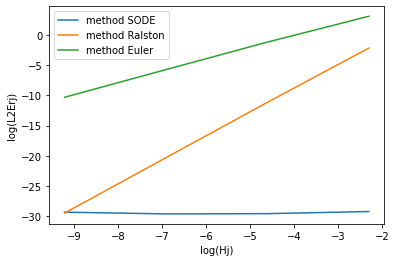

In [95]:
plt.plot(np.log(Hj),np.log(L2Erj[:,0]),label='method SODE')
plt.plot(np.log(Hj),np.log(L2Erj[:,1]),label='method Ralston')
plt.plot(np.log(Hj),np.log(L2Erj[:,2]),label='method Euler')
plt.xlabel('log(Hj)')
plt.ylabel('log(L2Erj)')
plt.legend()
plt.show()

By assuming that $log(H_j)$ is the explanatory variable of $log(L2Er_j)$, complete the simple linear regression in the case of  **RalstonOdeSys**, **EulerOdeSys** and display the regression coeficient.

Note: Use the whole data to train your linear model.

In [96]:
d={"Hj":np.log(Hj), "Ralston":np.log(L2Erj[:,1]), "Euler":np.log(L2Erj[:,2])}
data=pd.DataFrame(d)
data
# Create linear regression object
Single_lr1= LinearRegression()
Single_lr2= LinearRegression()
U=data.Hj.values.reshape(-1, 1) # independent variable
V1=data.Ralston.values.flatten() # dependent variable
V2=data.Euler.values.flatten() # dependent variable
Single_lr1.fit(U, V1)
Single_lr2.fit(U, V2)
# get the value of alpha and beta
alpha1 = Single_lr1.coef_
beta1 = Single_lr1.intercept_
alpha2 = Single_lr2.coef_
beta2 = Single_lr2.intercept_
# print the value of alpha and beta
print("The regression coeficient ")
print('alpha1 = ', alpha1[0])
print('beta1 = ', beta1)
print('alpha2 = ', alpha2[0])
print('beta2 = ', beta2)

The regression coeficient 
alpha1 =  3.9711340462732156
beta1 =  7.080027416158437
alpha2 =  1.9520593672540327
beta2 =  7.742124192676786


**Problem 6**

1-The cost of admission to the world cup 2022 game is
- 320 USD for 3 children, 1 female  and 1 male 
- 600 USD  for 4 females and 2 males 
- 600 USD  for 5 children, 2 females and 2 males 

Transform the problem into a system of equation (as markdown in the cell below)

let's $x$ the number of children, $y$ the number of females and $z$ the number of males. We have:
\begin{equation}
\begin{cases}
    3x+y+z= 320\\
    4y+2z=600\\
    5x+2y+2z=600
\end{cases}
\end{equation}



2- Write a Python code to compute and display how much is the admission for each child, female and male?

In [97]:

A=np.array([[3,1,1],[0,4,2],[5,2,2]])
b=np.array([320,600,600])
S=np.linalg.solve(A,b)
print(S)
print("the admission for each child was: ",S[0])
print("the admission for each females is: ",S[1])
print("the admission for each males is: ",S[2])

[ 40. 100. 100.]
the admission for each child was:  39.99999999999996
the admission for each females is:  99.99999999999989
the admission for each males is:  100.00000000000021


3- Using the Python in-built function fsolve with unitial guess $x=1, y=1$, write a Python code to solve the following system

\begin{equation}
\begin{cases}
    e^{x^2} + x = sin(y)\\
    2e^x + y = 3
\end{cases}
\end{equation}


In [98]:
def myfunction(z):
    x=z[0]
    y=z[1]
    F=np.empty((2))
    F[0]=np.exp(x**2)+x-np.sin(y)
    F[1]=2*np.exp(x)+np.cos(y)-2
    return F
zGuess=np.array([1,1])
z=fsolve(myfunction,zGuess)
print("x=",z[0])
print("y=",z[1])

x= -0.3793915333122747
y= -5.395803917749443
